# Imports

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the training dataset

In [7]:
train_path = '../data/train/train.csv'
train_data = pd.read_csv(train_path)

# Load the test dataset

In [50]:
test_path = '../data/test/test.csv'
test_data = pd.read_csv(test_path)
real_test_data = pd.read_csv(test_path)
test_data.Age.fillna(test_data.Age.median(), inplace=True)
test_data.Fare.fillna(test_data.Fare.median(), inplace=True)

selected_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
# Merge survived column for accuracy test aginst test data
test_data = test_data[selected_columns]
X_test = pd.get_dummies(X_test, columns=['Sex'])

In [51]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0
...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0,1
414,1,39.0,0,0,108.9000,1,0
415,3,38.5,0,0,7.2500,0,1
416,3,27.0,0,0,8.0500,0,1


# Select only relevant colums of data

In [52]:
selected_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
data_selected = train_data[selected_columns]

### Age data is missing some data

In [53]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


### Fill missing data with median

In [54]:
data_selected.Age.fillna(data_selected.Age.median(), inplace=True)

/tmp/ipykernel_140061/1801840652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected.Age.fillna(data_selected.Age.median(), inplace=True)


In [55]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


## Separate the features and target variable

In [56]:
X = data_selected.drop('Survived', axis=1)  # Features
y = data_selected['Survived']  # Target variable

In [57]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


### We can see that Sex is categorized with strings we will need to encode it as numbers

In [58]:
# Convert Sex variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Sex'])

In [59]:
X_encoded

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
888,3,28.0,1,2,23.4500,1,0
889,1,26.0,0,0,30.0000,0,1


## Split the data into training and validation sets

In [60]:
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# SVM


Evaluation Metrics for svm:
Accuracy: 0.78
Precision: 0.74
Recall: 0.73
F1-score: 0.73


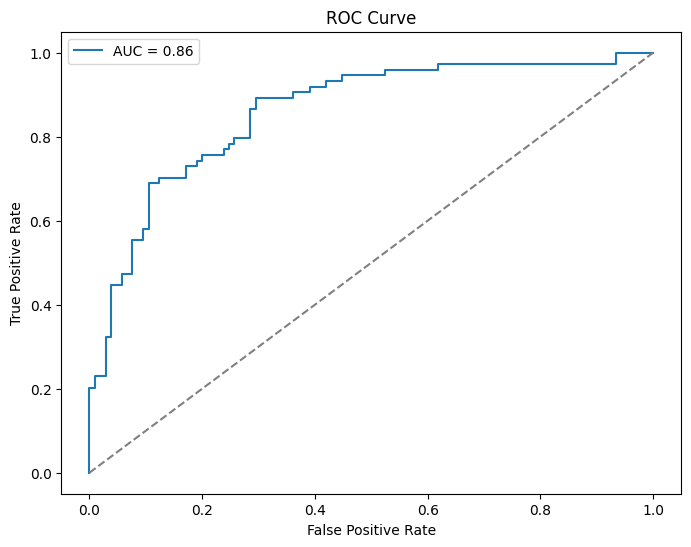

AUC: 0.86


In [75]:
# Initialize the svm classifier
svm_classifier = SVC(kernel='rbf', C=100, probability=True, random_state=42)

# Train the svm model
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
svm_predictions = svm_classifier.predict(X_val)

# Evaluate the accuracy of the svm model on the validation set
svm_accuracy = accuracy_score(y_val, svm_predictions)
svm_precision = precision_score(y_val, svm_predictions)
svm_recall = recall_score(y_val, svm_predictions)
svm_f1 = f1_score(y_val, svm_predictions)

# Display evaluation metrics for svm
print("\nEvaluation Metrics for svm:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-score: {svm_f1:.2f}")

y_pred_proba = svm_classifier.predict_proba(X_val)[:, 1]  # Extract probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"AUC: {auc:.2f}")



Evaluation Metrics for KNN:
Accuracy: 0.75
Precision: 0.81
Recall: 0.51
F1-score: 0.63


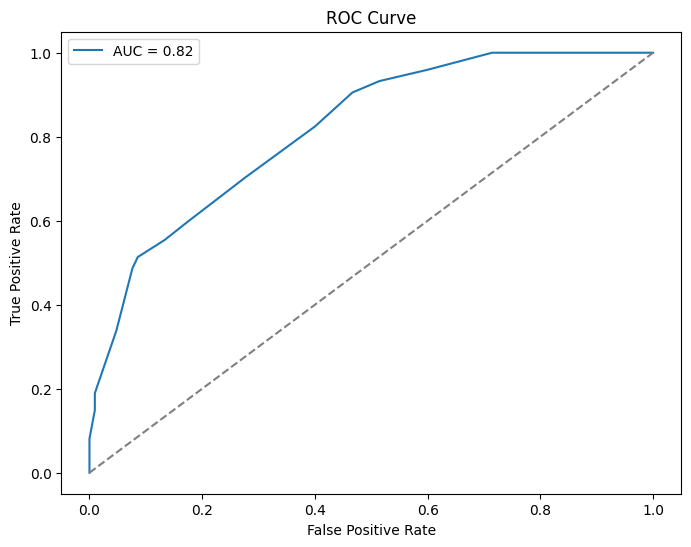

AUC: 0.82


In [78]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=20, algorithm='brute')  # You can specify the number of neighbors (K) here

# Train the KNN model
knn_classifier.fit(X_train, y_train)

# Make predictions on the validation set
knn_predictions = knn_classifier.predict(X_val)

# Evaluate the accuracy of the KNN model on the validation set
knn_accuracy = accuracy_score(y_val, knn_predictions)
knn_precision = precision_score(y_val, knn_predictions)
knn_recall = recall_score(y_val, knn_predictions)
knn_f1 = f1_score(y_val, knn_predictions)

# Display evaluation metrics for KNN
print("\nEvaluation Metrics for KNN:")
print(f"Accuracy: {knn_accuracy:.2f}")
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1-score: {knn_f1:.2f}")

y_pred_proba = knn_classifier.predict_proba(X_val)[:, 1]  # Extract probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"AUC: {auc:.2f}")

# KNN

In [77]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=20, probability=True, algorithm='brute')  # You can specify the number of neighbors (K) here

# Train the KNN model
knn_classifier.fit(X_train, y_train)

# Make predictions on the validation set
knn_predictions = knn_classifier.predict(X_val)

# Evaluate the accuracy of the KNN model on the validation set
knn_accuracy = accuracy_score(y_val, knn_predictions)
knn_precision = precision_score(y_val, knn_predictions)
knn_recall = recall_score(y_val, knn_predictions)
knn_f1 = f1_score(y_val, knn_predictions)

# Display evaluation metrics for KNN
print("\nEvaluation Metrics for KNN:")
print(f"Accuracy: {knn_accuracy:.2f}")
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1-score: {knn_f1:.2f}")

y_pred_proba = knn_classifier.predict_proba(X_val)[:, 1]  # Extract probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"AUC: {auc:.2f}")

TypeError: KNeighborsClassifier.__init__() got an unexpected keyword argument 'probability'

# Bayes Classifier


Evaluation Metrics for nb:
Accuracy: 0.79
Precision: 0.76
Recall: 0.72
F1-score: 0.74


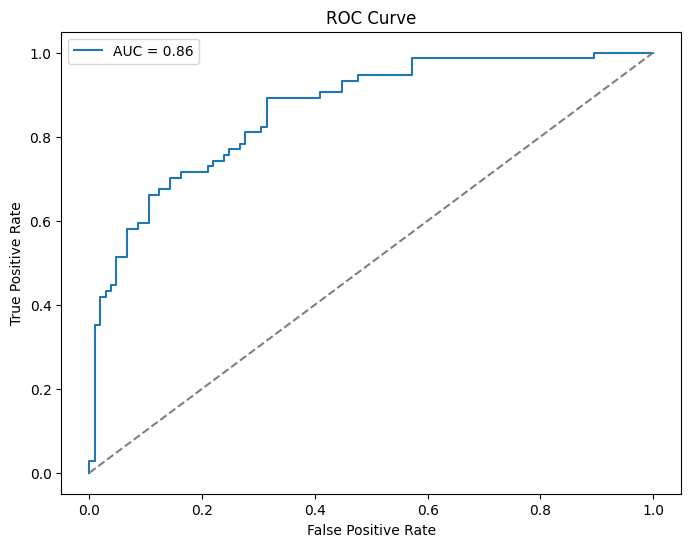

AUC: 0.86


In [79]:
# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes model
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
nb_predictions = nb_classifier.predict(X_val)

nb_accuracy = accuracy_score(y_val, nb_predictions)
nb_precision = precision_score(y_val, nb_predictions)
nb_recall = recall_score(y_val, nb_predictions)
nb_f1 = f1_score(y_val, nb_predictions)

# Display evaluation metrics for nb
print("\nEvaluation Metrics for nb:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1-score: {nb_f1:.2f}")

y_pred_proba = nb_classifier.predict_proba(X_val)[:, 1]  # Extract probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"AUC: {auc:.2f}")